In [ ]:
#Data import and basic exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.max_rows=None
pd.options.display.max_rows=None

In [3]:
app=pd.read_csv(r"C:\Users\inish\Downloads\poject\application_data.csv")

In [7]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
#Feature selection

In [8]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
app.shape

(307511, 122)

In [10]:
missing_info=pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
missing_info.rename(columns={'index':'column_name',0:'null_count'},inplace=True)
missing_info

,column_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [11]:
missing_info['missing_percent']=missing_info['null_count']/app.shape[0]*100
missing_info.to_excel(r"C:\Users\inish\Downloads\poject\missing_info.xlsx",index=False)
missing_info.head()

,column_name,null_count,missing_percent
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [12]:
missing_col=missing_info[missing_info['missing_percent']>=40]['column_name'].to_list()
app_missing_remove=app.drop(labels=missing_col,axis=1)
app_missing_remove.shape

(307511, 73)

In [13]:
app_missing_remove.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
flag_col=[]
for col in app_missing_remove.columns:
    if col.startswith('FLAG_'):
        flag_col.append(col)

flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
len(flag_col)

28

In [16]:
app_missing_remove[flag_col].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
flag_target_columns=app_missing_remove[flag_col+['TARGET']].head()

In [18]:
flag_target_columns.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='FLAG_DOCUMENT_18', ylabel='count'>

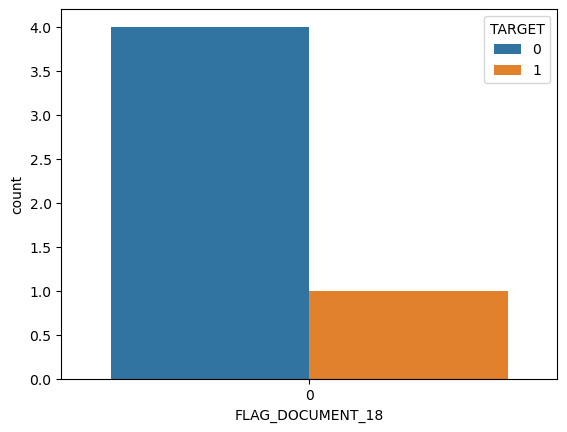

In [19]:
sns.countplot(data=flag_target_columns,x='FLAG_DOCUMENT_18',hue='TARGET')

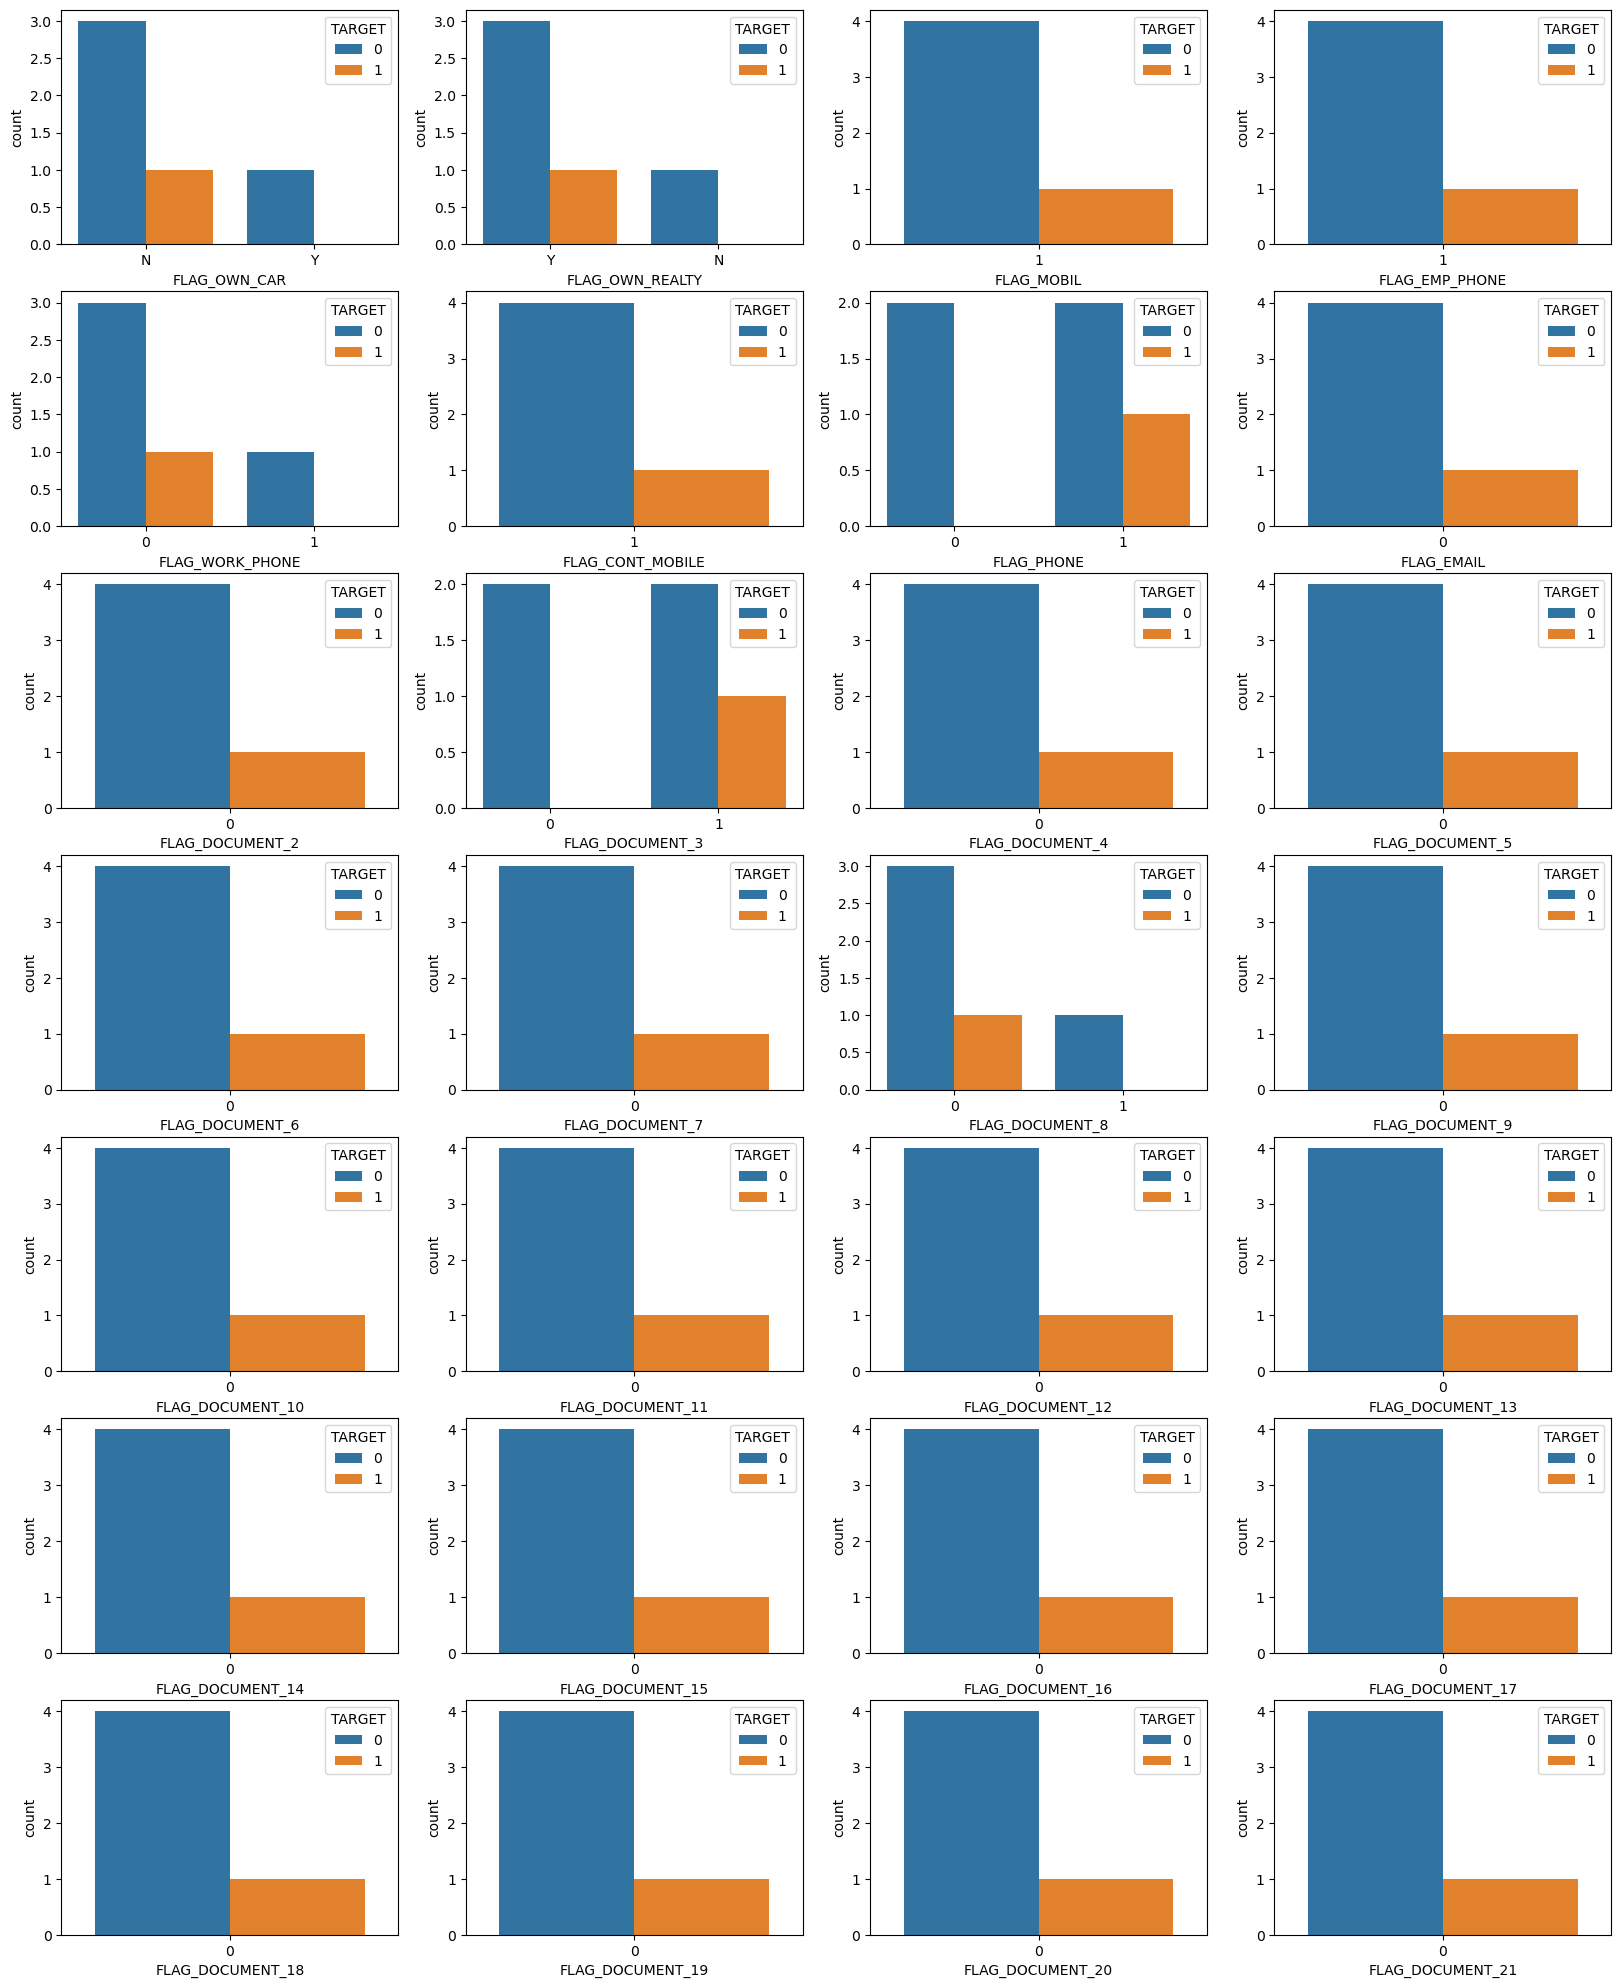

In [20]:
plt.figure(figsize=(20,25))

for i,col in enumerate (flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_target_columns,x=col,hue='TARGET')
    
    

In [21]:
figure_corr=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','TARGET']
flag_corr_df=app_missing_remove[figure_corr]



In [22]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [23]:
flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY']=flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

C:\Users\inish\AppData\Local\Temp\ipykernel_3900\781577931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\inish\AppData\Local\Temp\ipykernel_3900\781577931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY']=flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

<Axes: >

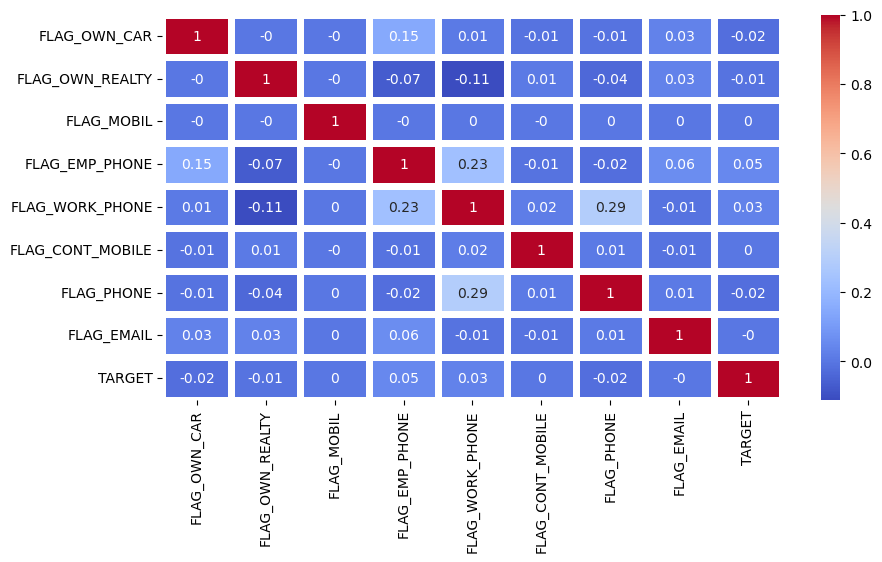

In [24]:
corr_df=round(flag_corr_df.corr(),2)

plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='coolwarm',linewidths=5,annot=True)

In [25]:
app_flag_removed=app_missing_remove.drop(labels=flag_col,axis=1)
app_flag_removed.shape                                                

(307511, 45)

In [26]:
app_flag_removed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

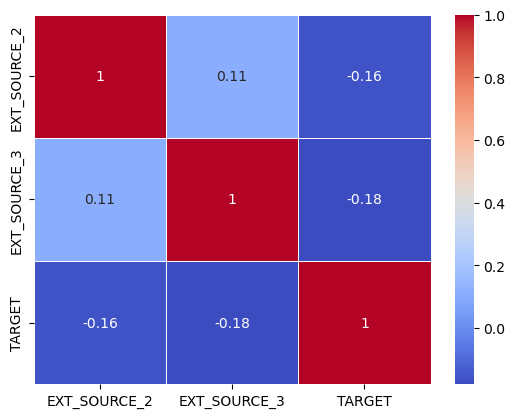

In [27]:
sns.heatmap(data=round(app_flag_removed[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',
           linewidth=.5,annot=True)

In [28]:
app_source_col_removed=app_flag_removed.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_source_col_removed.shape


(307511, 43)

In [137]:
#Feature Engineering

In [29]:
app_source_col_removed.isnull().sum().sort_values()/app_source_col_removed.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [30]:
app_source_col_removed.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [31]:
app_source_col_removed['CNT_FAM_MEMBERS']=app_source_col_removed['CNT_FAM_MEMBERS'].fillna(app_source_col_removed['CNT_FAM_MEMBERS'].mode()[0])

In [32]:
app_source_col_removed['CNT_FAM_MEMBERS'].isnull().sum()

0

In [33]:
app_source_col_removed.groupby('OCCUPATION_TYPE').size()

OCCUPATION_TYPE
Accountants               9813
Cleaning staff            4653
Cooking staff             5946
Core staff               27570
Drivers                  18603
HR staff                   563
High skill tech staff    11380
IT staff                   526
Laborers                 55186
Low-skill Laborers        2093
Managers                 21371
Medicine staff            8537
Private service staff     2652
Realty agents              751
Sales staff              32102
Secretaries               1305
Security staff            6721
Waiters/barmen staff      1348
dtype: int64

In [139]:
# Missing imputation

In [34]:
app_source_col_removed['OCCUPATION_TYPE'].isnull().sum()

96391

In [35]:
app_source_col_removed['OCCUPATION_TYPE']=app_source_col_removed['OCCUPATION_TYPE'].fillna(app_source_col_removed['OCCUPATION_TYPE'].mode()[0])

In [36]:
app_source_col_removed['OCCUPATION_TYPE'].isnull().sum()

0

In [37]:
app_source_col_removed.groupby('NAME_TYPE_SUITE').size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64

In [38]:
app_source_col_removed['NAME_TYPE_SUITE'].isnull().sum()

1292

In [39]:
app_source_col_removed['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [40]:
app_source_col_removed['NAME_TYPE_SUITE']=app_source_col_removed['NAME_TYPE_SUITE'].fillna(app_source_col_removed['NAME_TYPE_SUITE'].mode()[0])

In [41]:
app_source_col_removed['NAME_TYPE_SUITE'].isnull().sum()

0

In [42]:
len(app_source_col_removed['AMT_ANNUITY'])

307511

In [43]:
app_source_col_removed.groupby('AMT_ANNUITY').size()

AMT_ANNUITY
1615.5         1
1980.0         2
1993.5         1
2052.0         1
2164.5         2
2173.5         1
2187.0         2
2205.0         1
2295.0         2
2299.5         1
2317.5         2
2412.0         1
2425.5         1
2511.0         1
2542.5         3
2583.0         1
2596.5         1
2605.5         1
2628.0         1
2673.0         1
2704.5         1
2713.5         1
2722.5         2
2749.5         1
2754.0         2
2781.0         2
2785.5         1
2844.0         4
2857.5         2
2875.5         2
2880.0         2
2893.5         4
2920.5         5
2929.5         2
2943.0         1
2974.5         2
2979.0         2
2983.5         1
3006.0         2
3010.5         1
3015.0         1
3042.0         1
3051.0         4
3060.0         1
3096.0         1
3114.0         3
3132.0         1
3136.5         1
3145.5         1
3150.0         2
3163.5         1
3172.5         2
3195.0         7
3204.0         1
3208.5         1
3213.0         1
3222.0         2
3244.5         2
32

In [44]:
app_source_col_removed['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [45]:
app_source_col_removed['AMT_ANNUITY']=app_source_col_removed['AMT_ANNUITY'].fillna(app_source_col_removed['AMT_ANNUITY'].mean())

In [46]:
app_source_col_removed['AMT_ANNUITY'].isnull().sum()

0

In [47]:
app_source_col_removed['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [141]:
## Value modification

In [48]:
amt_req_col=[]
for col in app_source_col_removed.columns:
    if col.startswith('AMT_REQ_CREDIT_BUREAU'):
        amt_req_col.append(col)                   
    
                       

In [49]:
amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [50]:
for col in amt_req_col:
    app_source_col_removed[col]=app_source_col_removed[col].fillna((app_source_col_removed[col].median()))
    

In [51]:
app_source_col_removed[col].isnull().sum()

0

In [142]:
### Outlier detection and treatment

In [52]:
app_source_col_removed['AMT_GOODS_PRICE'].isnull().sum()

278

In [53]:
app_source_col_removed['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [54]:
app_source_col_removed['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [55]:
app_source_col_removed['AMT_GOODS_PRICE']=app_source_col_removed['AMT_GOODS_PRICE'].fillna((app_source_col_removed['AMT_GOODS_PRICE'].median()))


In [56]:
app_source_col_removed['AMT_GOODS_PRICE'].isnull().sum()

0

In [57]:
app_source_col_removed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
days_column=[]
for col in app_source_col_removed:
    if col.startswith('DAYS_'):
        days_column.append(col)

In [59]:
days_column

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [60]:
for col in days_column:
    app_source_col_removed[col]=abs(app_source_col_removed[col])

# app_source_col_removed.info()

In [61]:
app_source_col_removed['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [62]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges=['0-100k','100k-200k','200k-300','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','Above 900k']

app_source_col_removed['AMT_GOODS_PRICE_RANGE']=pd.cut(app_source_col_removed['AMT_GOODS_PRICE'],bins,labels=ranges)

In [63]:
app_source_col_removed.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100k         8709
100k-200k     32956
200k-300      62761
300k-400k     21219
400k-500k     57251
500k-600k     13117
600k-700k     40024
700k-800k      8110
800k-900k     21484
Above 900k    41880
dtype: int64

In [64]:
app_source_col_removed['AMT_INCOME_TOTAL'].agg(['min','max','median'])

min           25650.0
max       117000000.0
median       147150.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
app_source_col_removed['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
bins=[0,100000,150000,200000,250000,300000,350000,400000,472500]
ranges=['0-100k','100k-150k','150k-200','200k-250k','250k-300k','300k-350k','350k-400k','Above 400k']
    
app_source_col_removed['AMT_INCOME_TOTAL_RANGE']=pd.cut(app_source_col_removed['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [67]:
app_source_col_removed.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100k        63698
100k-150k     91591
150k-200      64307
200k-250k     48137
250k-300k     17039
300k-350k      8874
350k-400k      5802
Above 400k     5049
dtype: int64

In [68]:
app_source_col_removed['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [69]:
bins=[0,200000,400000,600000,800000,900000,1000000,1854000]
ranges=['0-200k','200k-400k','400k-600','600k-800k','800k-900k','900k-1M','Above 1M']
    
app_source_col_removed['AMT_CREDIT_RANGE']=pd.cut(app_source_col_removed['AMT_CREDIT'],bins,labels=ranges)

In [70]:
app_source_col_removed.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200k       36144
200k-400k    81151
400k-600     66270
600k-800k    43242
800k-900k    21792
900k-1M       8927
Above 1M     46910
dtype: int64

In [71]:
app_source_col_removed['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.001])

0.100    11074.50
0.200    14701.50
0.300    18189.00
0.400    21870.00
0.500    24903.00
0.600    28062.00
0.700    32004.00
0.800    37516.50
0.900    45954.00
0.990    70006.50
0.001     3933.09
Name: AMT_ANNUITY, dtype: float64

In [72]:
app_source_col_removed['AMT_ANNUITY'].max()

258025.5

In [73]:
app_source_col_removed['AMT_ANNUITY'].agg(['min','max','median'])

min         1615.5
max       258025.5
median     24903.0
Name: AMT_ANNUITY, dtype: float64

In [74]:
bins=[0,50000,100000,150000,200000,258025]
ranges=['0-50k','50k-100k','100k-150','150k-200k','Above 200k']
    
app_source_col_removed['AMT_ANNUITY_RANGE']=pd.cut(app_source_col_removed['AMT_ANNUITY'],bins,labels=ranges)

In [75]:
app_source_col_removed.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-50k         286214
50k-100k       20792
100k-150         437
150k-200k         32
Above 200k        35
dtype: int64

In [76]:
app_source_col_removed['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.001])

0.100       392.0
0.200       749.0
0.300      1132.0
0.400      1597.0
0.500      2219.0
0.600      3032.0
0.700      4435.0
0.800      9188.0
0.900    365243.0
0.990    365243.0
0.001        60.0
Name: DAYS_EMPLOYED, dtype: float64

In [77]:
app_source_col_removed['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [78]:
bins=[0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]
ranges=['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y','Above 50Y']
    
app_source_col_removed['DAYS_EMPLOYED_RANGE']=pd.cut(app_source_col_removed['DAYS_EMPLOYED'],bins,labels=ranges)

In [79]:
app_source_col_removed['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.001])

0.100    10284.0
0.200    11694.0
0.300    13140.0
0.400    14416.0
0.500    15750.0
0.600    17220.0
0.700    18885.0
0.800    20474.0
0.900    22181.0
0.990    24419.0
0.001     7759.0
Name: DAYS_BIRTH, dtype: float64

In [80]:
app_source_col_removed['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [81]:
bins=[0,10000,12000,14000,16000,18000,20000,25229]
ranges=['0-10Y','10Y-20Y','20Y-30Y','30Y-40','40Y-50Y','50Y-60Y''60Y-70Y','Above 70y']
    
app_source_col_removed['DAYS_BIRTH_RANGE']=pd.cut(app_source_col_removed['DAYS_BIRTH'],bins,labels=ranges)

In [82]:
app_source_col_removed.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
0-10Y             24071
10Y-20Y           44112
20Y-30Y           44547
30Y-40            46912
40Y-50Y           39592
50Y-60Y60Y-70Y    37951
Above 70y         70326
dtype: int64

In [143]:
### Data Analysis

In [83]:
app_source_col_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [84]:
app_source_col_removed.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [85]:
bject_variable=app_source_col_removed.select_dtypes(include=['object']).columns

In [86]:
bject_variable

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [87]:
app_source_col_removed.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

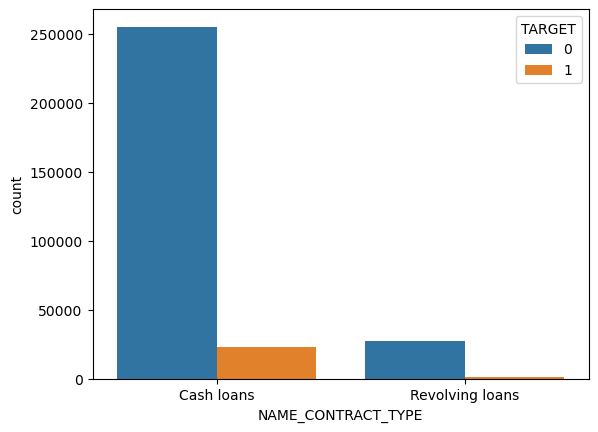

In [88]:
sns.countplot(data=app_source_col_removed,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [89]:
data_percentage=app_source_col_removed[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()

In [90]:
data_percentage

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [91]:
data_percentage['percentage']=data_percentage['TARGET']*100

In [92]:
data_percentage

,NAME_CONTRACT_TYPE,TARGET,percentage
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='percentage'>

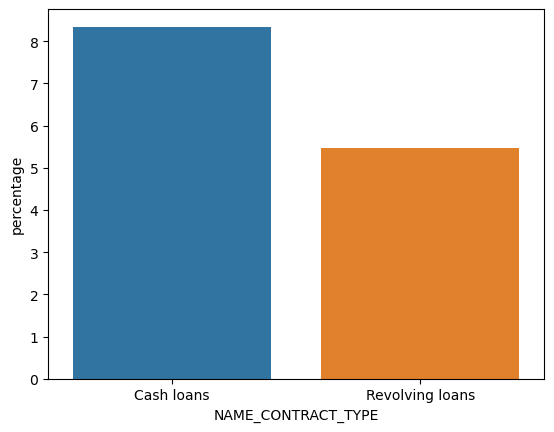

In [93]:
sns.barplot(data=data_percentage,x='NAME_CONTRACT_TYPE',y='percentage')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='percentage'>

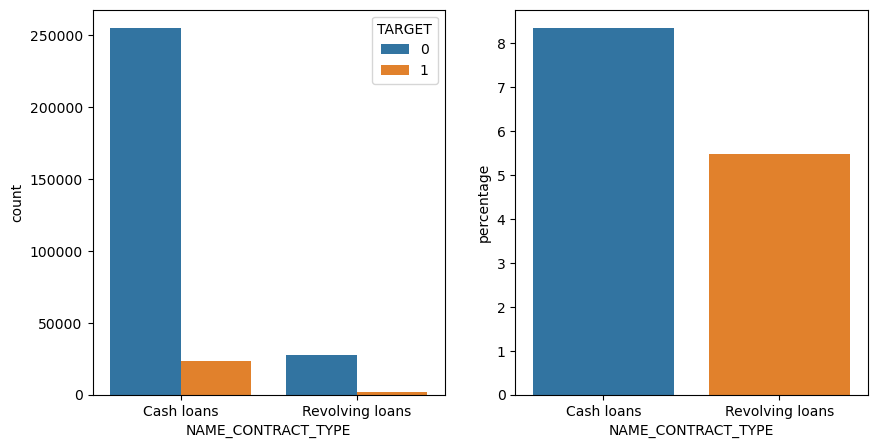

In [94]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_source_col_removed,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_percentage,x='NAME_CONTRACT_TYPE',y='percentage')

In [95]:
bject_variable

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

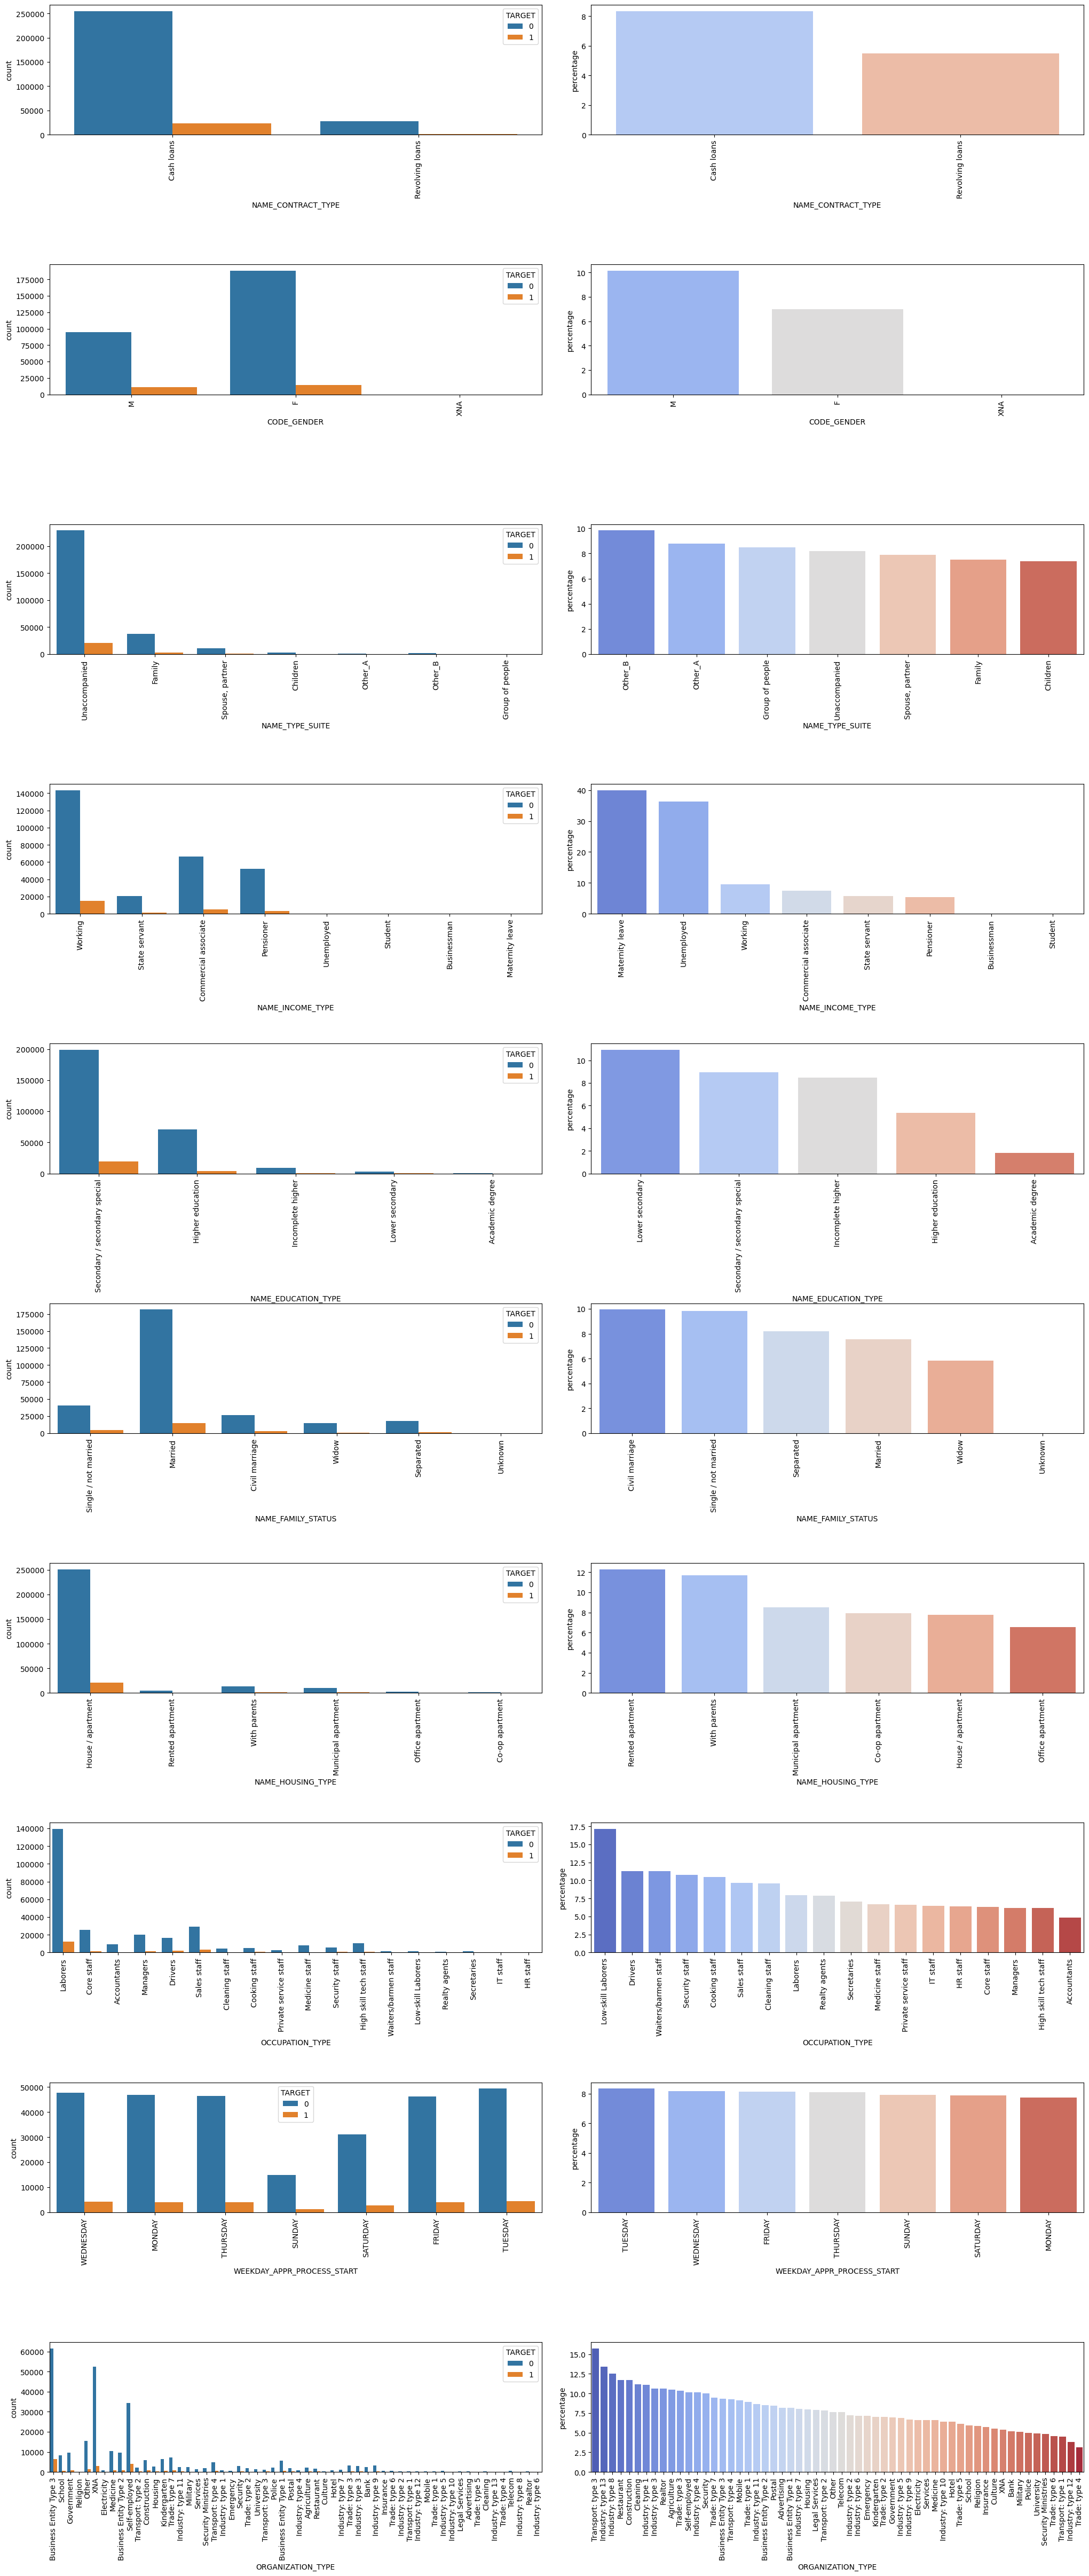

In [96]:
plt.figure(figsize=(25,60))

for i, var in enumerate(bject_variable):
    data_percentage=app_source_col_removed[[var,'TARGET']].groupby([var],as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_percentage['percentage']=data_percentage['TARGET']*100

    

    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=app_source_col_removed,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_percentage,x=var,y='percentage',palette='coolwarm')
    plt.xticks(rotation=90)
    

    

In [97]:
app_source_col_removed['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [98]:
app_source_col_removed.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [99]:
numeric_variable=app_source_col_removed.select_dtypes(include=['float64','int64']).columns
numeric_cat_variable=app_source_col_removed.select_dtypes(include=['float64','int64','category']).columns
numeric_variable

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [100]:
len(numeric_variable)

33

In [101]:
numeric_data=app_source_col_removed[numeric_variable]
numeric_data.groupby(['TARGET']).size()


TARGET
0    282686
1     24825
dtype: int64

In [102]:
numeric_data=app_source_col_removed[numeric_variable]
numeric_data.groupby(['TARGET']).size()/numeric_data.shape[0]*100


TARGET
0    91.927118
1     8.072882
dtype: float64

In [103]:
numeric_data=app_source_col_removed[numeric_variable]
defaulters=numeric_data[numeric_data['TARGET']==1].drop(['TARGET'],axis=1)
repayers=numeric_data[numeric_data['TARGET']==0].drop(['TARGET'],axis=1)
defaulters.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,...,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,...,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,...,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
repayers.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [105]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [106]:
defaulters_corr=defaulters.corr()
defaulters_corr_unstack=defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level-0':'var1',
                                                                                                                    'level-2':'var2',
                                                                                                                       0:'correlation'})

In [107]:
defaulters_corr_unstack.head()

,level_0,level_1,correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [108]:
defaulters_corr_unstack['correlation']=abs(defaulters_corr_unstack['correlation'])
defaulters_corr_unstack.sort_values(by=['correlation'],ascending=False)

,level_0,level_1,correlation
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [109]:
defaulters_corr_unstack['correlation']=abs(defaulters_corr_unstack['correlation'])
defaulters_corr_unstack.dropna(subset=['correlation']).sort_values(by=['correlation'],ascending=False).head()

,level_0,level_1,correlation
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994


In [114]:
repayers_corr=repayers.corr()
repayers_corr_unstack=repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1',
                                                                                                                    'level_1':'var2',
                                                                                                                       0:'correlation'})

In [115]:
repayers_corr_unstack.head()

,var1,var2,correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN


In [116]:
repayers_corr_unstack['correlation']=abs(repayers_corr_unstack['correlation'])
repayers_corr_unstack.dropna(subset=['correlation']).sort_values(by=['correlation'],ascending=False).head()

,var1,var2,correlation
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
163,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861


In [117]:
numeric_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
amount_variable=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

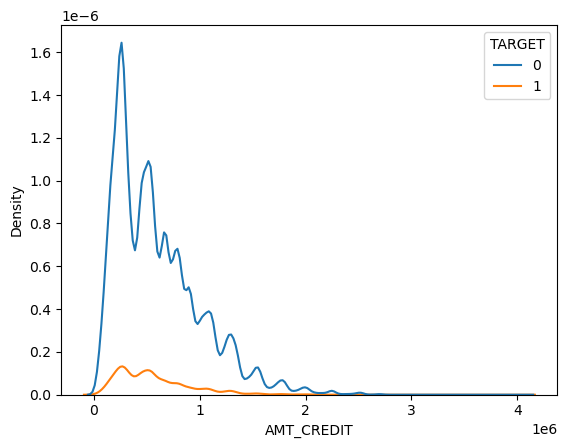

In [119]:
sns.kdeplot(data=numeric_data,x='AMT_CREDIT',hue='TARGET')

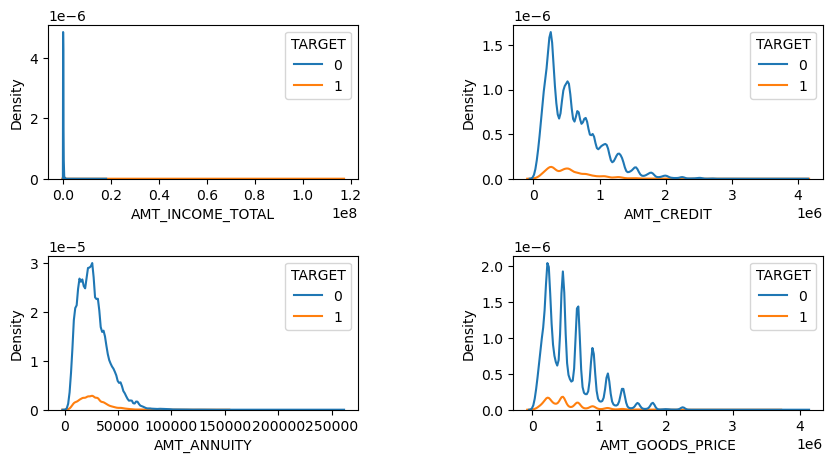

In [122]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amount_variable):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=numeric_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [125]:
numeric_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

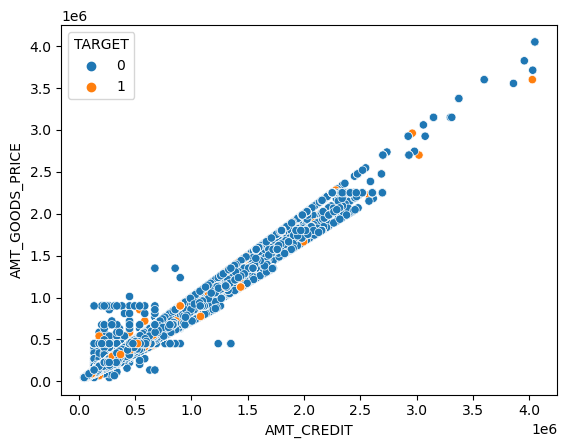

In [126]:
sns.scatterplot(data=numeric_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

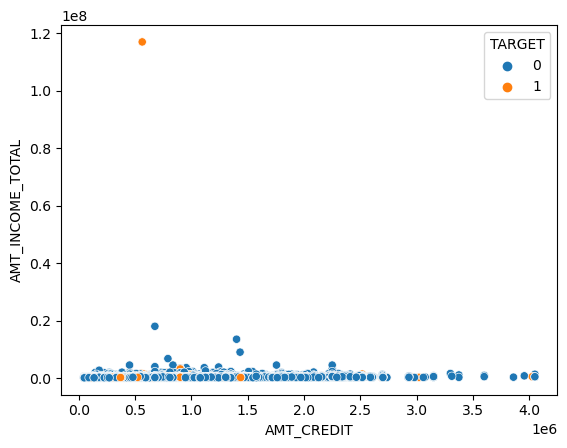

In [127]:
sns.scatterplot(data=numeric_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

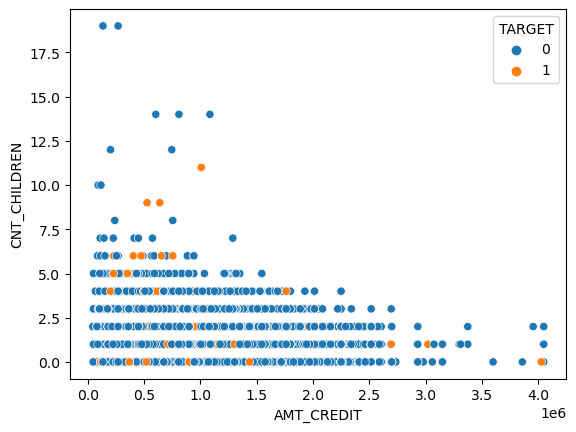

In [128]:
sns.scatterplot(data=numeric_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [132]:
amount_variable=numeric_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

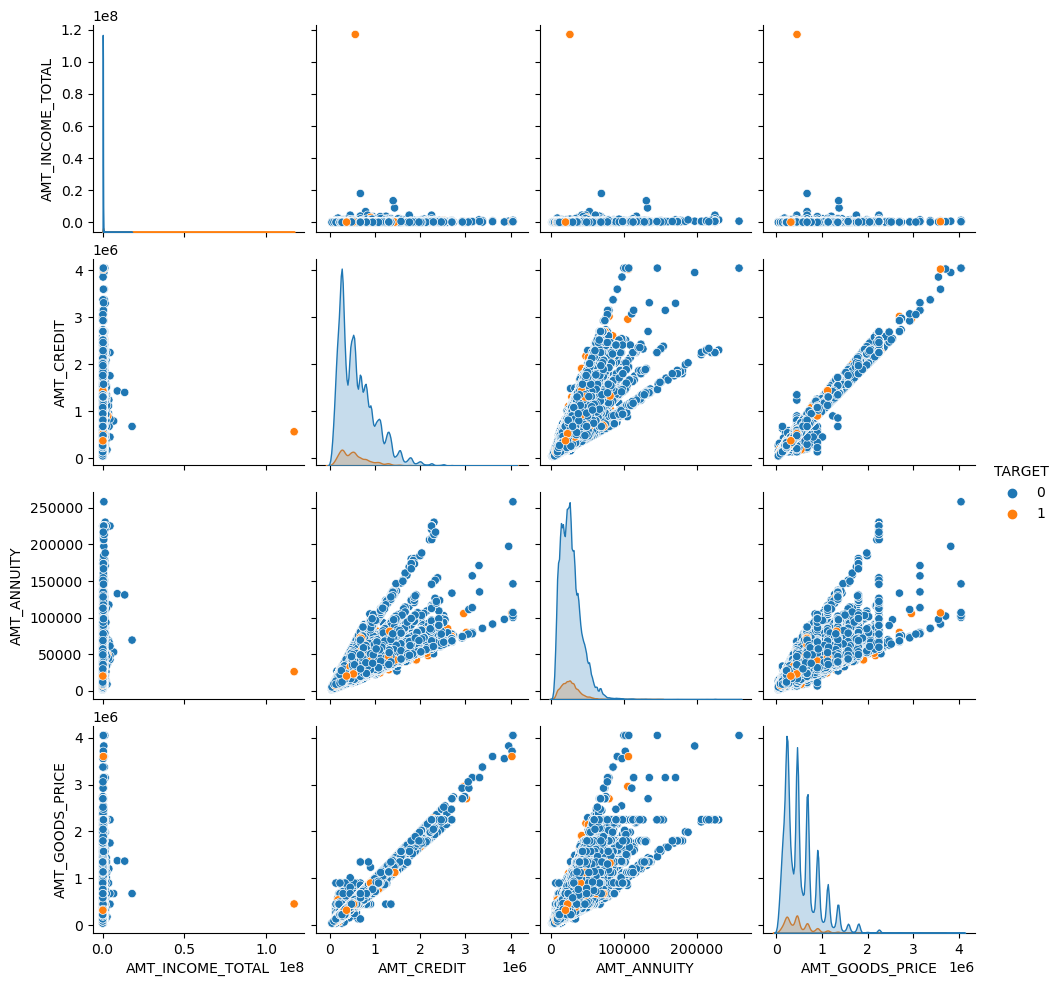

In [133]:
sns.pairplot(data=amount_variable,hue='TARGET')

In [144]:
## ALL the analysis

In [145]:
# most of the customers have taken cash loan
# customers who have taken cash loans are less likely to default

In [146]:
# CODE_GENDER -

# most of the loans have been taken by female
# default rate for females are just -7% which is safer and leser than male

In [147]:
# NAME_TYPE_SUITE -

# unaccompanied people had taken most of the loans and the default rate is -8.5% which is still okay

In [148]:
# NAME_INCOME_TYPE - 

# the safest segments are working, commercial associates and pensioners

In [149]:
# NAME_EDUCATION_TYPE -
# higher education is the safest segment to give the loan with a default rate of less than 5%

In [150]:
# NAME_FAMILY_STATUS - 
# married people are safe to target, default rate is 8%

In [151]:
# NAME_HOUSING_TYPE - 
# people having house_apartment are safe to give loan with default rate of -8%

In [152]:
# OCCUPATION_TYPE -
# low-skill labourers and drivers are higest defaulters
# Accountants are defaulters

In [153]:
# ORGANIZATION_TYPE -
# Transport type 3 are highest defaulters
# Others, Business Entity Type 3, Self Employed are good to go with default rate around 10%

In [154]:
### UNIVARIATE NUMERIC VARIABLES ANALYSIS
# most of the loans were given for the goods price ranging between 0 to 1ml
# most of the were given for the credit amount of 0 to 1ml
# mostly the customers are paying annuity of 0 to 50k

In [156]:
### BIVARIATE ANALYSIS
# people having income less than or equal to 1ml are more likely to take loans out of which who are taking loan of less than 1.5milion, could turn out to be defaulters
# people who can pay the annuityof 100k are more likely to get loan and that's upto less than 2 million (safer segment)


In [157]:
### FINAL CONCLUSIONS
# the credit amount should not be more than 1 million
# annuity can be made of 50k(depending on the eligibility)

### BANK SHOULD TARGET THE CUSTOMERS:
# working in business entity type 3, self employed, working in others
# working as accountants, core staff, managers and laborers
# having house/appartment and are married
# preferably women
# highly educated